In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Explore The Data

In [2]:
df = pd.read_csv('../DATA/Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Get the Data ready

In [5]:
X = df.drop('sales', axis=1)
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
polynomial_converter = PolynomialFeatures(include_bias=False)

In [9]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [11]:
poly_features = polynomial_converter.transform(X)

## Split the Data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_features,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

## Import and train the model

In [13]:
# import the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# calculate prediction
test_predictions = model.predict(X_test)

## Evaluate the model

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

print(f"MAE: {MAE}")
print(f'MSE: {MSE}') 
print(f'RMSE: {RMSE}')

MAE: 0.5475837919149456
MSE: 0.4603062493888044
RMSE: 0.6784587307926727


In [20]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1, 10):
    
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train,X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

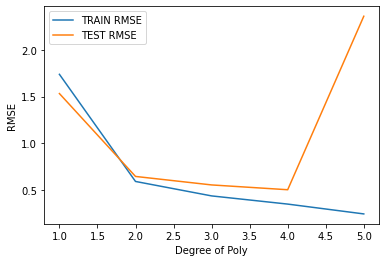

In [27]:
plt.plot(range(1,6), train_rmse_errors[:5], label="TRAIN RMSE")
plt.plot(range(1,6), test_rmse_errors[:5], label="TEST RMSE")

plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()

In [28]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [29]:
final_model = LinearRegression()

In [30]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [31]:
from joblib import dump, load

In [32]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [33]:
dump(final_poly_converter, 'final_poly_converter.joblib')

['final_poly_converter.joblib']